In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [22]:
df = pd.read_csv('driver-data.csv')
print(df.info())
print(df.shape)

data = df[['mean_dist_day', 'mean_over_speed_perc']]
print(data)

data.fillna(data.mean(), inplace=True)
print(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4000 non-null   int64  
 1   mean_dist_day         4000 non-null   float64
 2   mean_over_speed_perc  4000 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 93.9 KB
None
(4000, 3)
      mean_dist_day  mean_over_speed_perc
0             71.24                    28
1             52.53                    25
2             64.54                    27
3             55.69                    22
4             54.58                    25
...             ...                   ...
3995         160.04                    10
3996         176.17                     5
3997         170.91                    12
3998         176.14                     5
3999         168.03                     9

[4000 rows x 2 columns]
      mean_dist_day  mean_over_speed_perc
0 

C:\Users\USER\AppData\Local\Temp\ipykernel_11508\3319376715.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.fillna(data.mean(), inplace=True)


In [24]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)

In [36]:
wcss = []
for i in range(1,16):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
print(wcss)

[8000.0, 3911.9263904284157, 1756.5445821314272, 739.153450864558, 619.4037594867996, 502.03685490351063, 437.8780702842313, 374.8024199852508, 337.1456744336048, 306.97337203496494, 276.4393166945794, 248.09311615011552, 229.74448771226085, 210.66993580924535, 198.0806841488063]


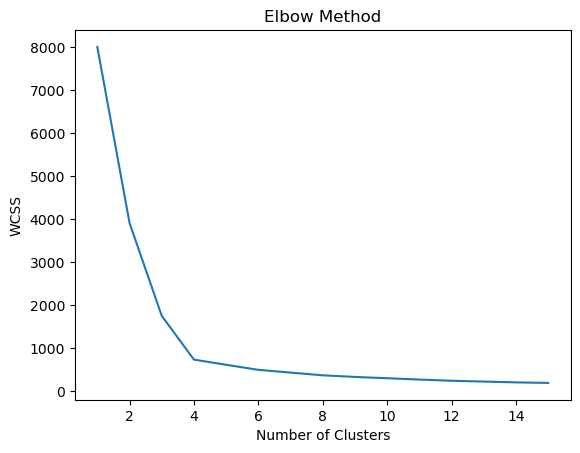

In [38]:
# Plot the Elbow method graph
plt.plot(range(1, 16), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

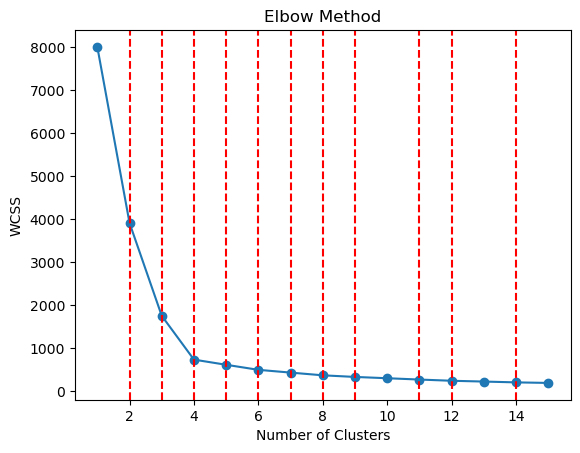

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# WCSS values (replace this with your actual data)
wcss = [8000.0, 3911.9263904284157, 1756.5445821314272, 739.153450864558, 
        619.4037594867996, 502.03685490351063, 437.8780702842313, 374.8024199852508, 
        337.1456744336048, 306.97337203496494, 276.4393166945794, 248.09311615011552, 
        229.74448771226085, 210.66993580924535, 198.0806841488063]

# Calculate the first and second differences
first_diff = np.diff(wcss)
second_diff = np.diff(first_diff)

# Find the indices where the second difference has large values (elbows)
elbows = np.where(second_diff > 0.5)[0] + 1  # Adjust index because we are diff'ing

# Plot the WCSS values
plt.plot(range(1, 16), wcss, marker='o')

# Add vertical lines at each "elbow"
for elbow in elbows:
    plt.axvline(x=elbow + 1, color='r', linestyle='--')  # Adding 1 because elbow indices are based on 0-indexing

# Add labels and title
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

# Show the plot
plt.show()
